In [1]:
import numpy as np
import matplotlib.pyplot as plt


Generating inner circle (class 0)...
Generating outer circle (class 1)...


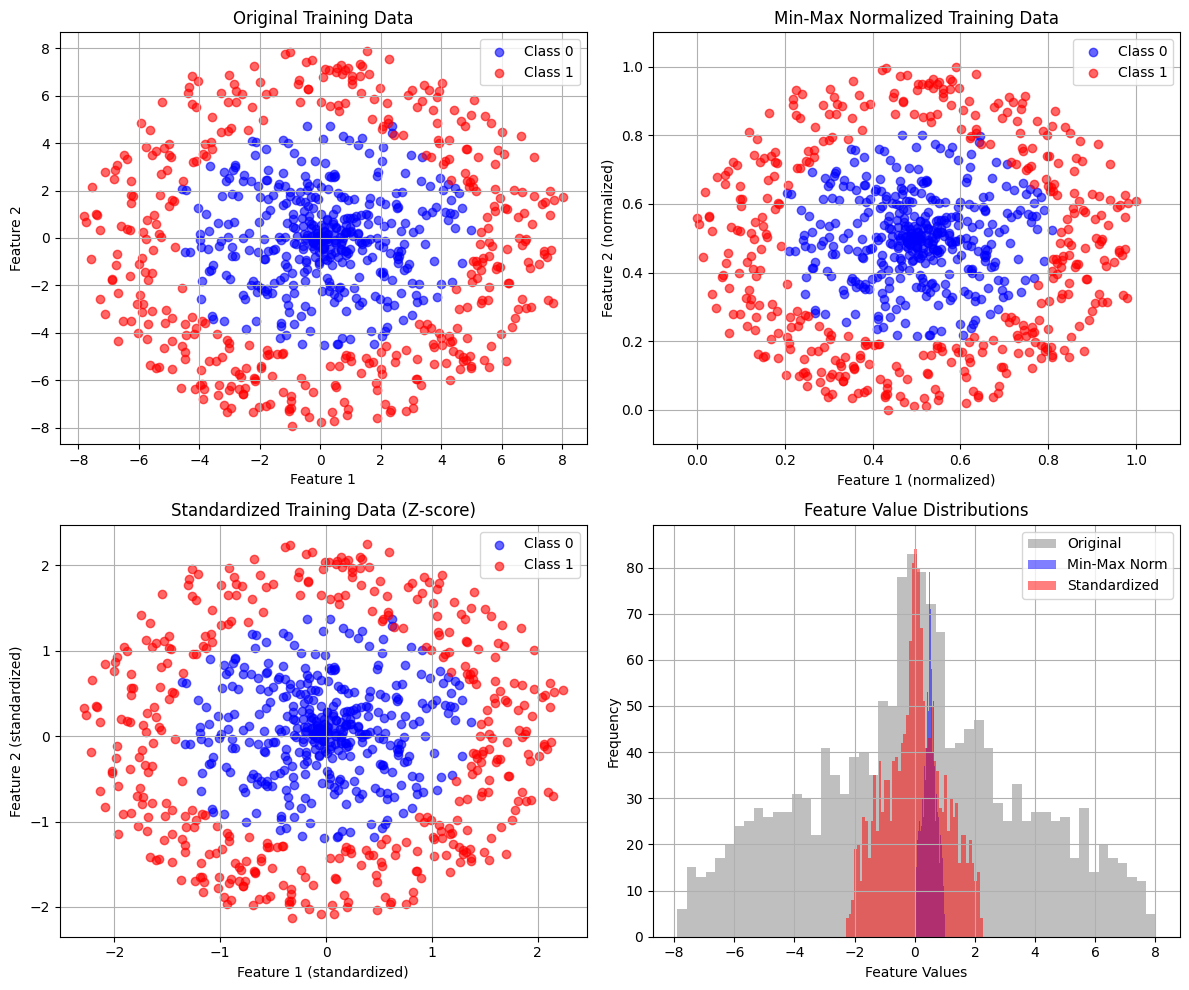

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
 
# Set random seed for reproducibility
np.random.seed(42)

# Configuration
n_samples = 500
noise_level = 0.1
radius_inner = 5
radius_outer = 8
 
# Generate Inner Circle (Class 0)
print("\nGenerating inner circle (class 0)...")
angle_inner = np.random.rand(n_samples) * 2 * np.pi
r_inner = np.random.rand(n_samples) * radius_inner
X_inner = np.array([r_inner * np.cos(angle_inner), r_inner * np.sin(angle_inner)]).T
y_inner = np.zeros(n_samples)

# Generate Outer Circle (Class 1)
print("Generating outer circle (class 1)...")
angle_outer = np.random.rand(n_samples) * 2 * np.pi
# Ensure outer circle starts from inner radius
r_outer = radius_inner + (radius_outer - radius_inner) * np.random.rand(n_samples)
 
# =============================================
# CONTINUATION FROM DATASET CREATION
# =============================================

# Combine inner and outer circle data
X_outer = np.array([r_outer * np.cos(angle_outer), r_outer * np.sin(angle_outer)]).T
y_outer = np.ones(n_samples)

# Combine datasets
X = np.vstack([X_inner, X_outer])
y = np.hstack([y_inner, y_outer])

# Add Gaussian noise to make it more realistic
X += np.random.randn(*X.shape) * noise_level

# Shuffle the data (important!)
shuffle_idx = np.random.permutation(len(X))
X = X[shuffle_idx]
y = y[shuffle_idx]

 

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% for testing
    random_state=42,    # For reproducibility
    stratify=y          # Keep same class distribution in both sets
)
 
 
# Calculate min and max from TRAINING data only (important!)
train_min = X_train.min(axis=0)
train_max = X_train.max(axis=0)

# Avoid division by zero
train_range = train_max - train_min
train_range[train_range == 0] = 1  # In case some feature has no variation

 
X_train_normalized = (X_train - train_min) / train_range
 
X_test_normalized = (X_test - train_min) / train_range

 
 
# Calculate mean and std from TRAINING data only
train_mean = X_train.mean(axis=0)
train_std = X_train.std(axis=0)

# Avoid division by zero
train_std[train_std == 0] = 1

# Standardize training data
X_train_st = (X_train - train_mean) / train_std
X_test_st = (X_test - train_mean) / train_std
 
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Original Training Data
axes[0, 0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], 
                   c='blue', label='Class 0', alpha=0.6)
axes[0, 0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], 
                   c='red', label='Class 1', alpha=0.6)
axes[0, 0].set_title('Original Training Data')
axes[0, 0].set_xlabel('Feature 1')
axes[0, 0].set_ylabel('Feature 2')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Min-Max Normalized Data
axes[0, 1].scatter(X_train_normalized[y_train==0, 0], X_train_normalized[y_train==0, 1], 
                   c='blue', label='Class 0', alpha=0.6)
axes[0, 1].scatter(X_train_normalized[y_train==1, 0], X_train_normalized[y_train==1, 1], 
                   c='red', label='Class 1', alpha=0.6)
axes[0, 1].set_title('Min-Max Normalized Training Data')
axes[0, 1].set_xlabel('Feature 1 (normalized)')
axes[0, 1].set_ylabel('Feature 2 (normalized)')
axes[0, 1].legend()
axes[0, 1].grid(True)
axes[0, 1].set_xlim(-0.1, 1.1)
axes[0, 1].set_ylim(-0.1, 1.1)

# Standardized Data
axes[1, 0].scatter(X_train_st[y_train==0, 0], X_train_st[y_train==0, 1], 
                   c='blue', label='Class 0', alpha=0.6)
axes[1, 0].scatter(X_train_st[y_train==1, 0], X_train_st[y_train==1, 1], 
                   c='red', label='Class 1', alpha=0.6)
axes[1, 0].set_title('Standardized Training Data (Z-score)')
axes[1, 0].set_xlabel('Feature 1 (standardized)')
axes[1, 0].set_ylabel('Feature 2 (standardized)')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Distribution comparison
axes[1, 1].hist(X_train.flatten(), bins=50, alpha=0.5, label='Original', color='gray')
axes[1, 1].hist(X_train_normalized.flatten(), bins=50, alpha=0.5, label='Min-Max Norm', color='blue')
axes[1, 1].hist(X_train_st.flatten(), bins=50, alpha=0.5, label='Standardized', color='red')
axes[1, 1].set_title('Feature Value Distributions')
axes[1, 1].set_xlabel('Feature Values')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()